In [91]:
# -*- coding:utf-8 -*-
# 3）模型构建
# 目标：判断是否是洗浴事件，是则1，不是则0
# 建立、训练多层神经网络 并完成模型的检验
# 选取”候选洗浴事件“的11个属性作为网络的输入，分别为：洗浴时间点、总用水时长、总停顿时长、平均停顿时长、停顿次数、
# 用水时长、用水时长/总用水时长、总用水量、平均水流量、水流量波动和停顿时长波动
from __future__ import print_function
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# 由于此单元的中间数据处理原书中有问题，所以此处采用书中给的训练数据，和测试数据，旨在测试模型在此数据上的运行
inputfile1 = './data/train_neural_network_data.xls' # 训练数据
inputfile2 = './data/test_neural_network_data.xls' # 测试数据
testoutputfile = './data/test_data.xlsx' #测试数据模型输出文件

data_train = pd.read_excel(inputfile1) # 读入训练数据
data_test = pd.read_excel(inputfile2) # 读入测试数据

data_train.head()

,热水事件,起始数据编号,终止数据编号,开始时间（begin_time）,根据日志判断是否为洗浴（1表示是，0表示否）,洗浴时间点,总用水时长（w_time）,总停顿时长（w_pause_time）,平均停顿时长（avg_pause_time）,停顿次数（pause）,用水时长（use_water_time）,用水/总时长（use_water_rate）,总用水量（w_water）,平均水流量（water_rate）,水流量波动（flow_volatility）,停顿时长波动（pause_volatility）
0,1,218,344,2014-10-19 08:51:30',0,8,591.999998,303.500013,50.583336,6,288.499985,0.487331,12.998333,2.703293,0.870856,650.106848
1,2,569,965,2014-10-19 15:55:23',1,15,1008.000005,46.499999,46.499999,1,961.500006,0.953869,50.626667,3.159230,0.202300,0.000000
2,3,1077,1128,2014-10-19 18:21:40',0,18,467.999997,269.499987,53.899997,5,198.500010,0.424145,7.087500,2.142317,0.404960,531.384976
3,4,1973,2236,2014-10-20 16:42:41',1,16,660.999996,23.499993,23.499993,1,637.500003,0.964448,32.193333,3.029961,0.291306,0.000000
4,5,2320,2435,2014-10-20 18:05:28',1,18,550.000005,164.500013,32.900003,5,385.499992,0.700909,13.459167,2.094812,0.395200,180.384977


In [92]:
# from sklearn.preprocessing import StandardScaler
# 训练集测试集区分
x_train = data_train.iloc[:,5:17].values  # 训练样本特征
y_train = data_train.iloc[:,4].values  # 训练样本标签列
x_test = data_test.iloc[:,5:17].values  # 测试样本特征
y_test = data_test.iloc[:,4].values  # 训练样本标签列
# 标准化
# stdScaler = StandardScaler().fit(x_train)
# x_stdtrain = stdScaler.transform(x_train)
# x_stdtest = stdScaler.transform(x_test)

In [93]:

# 训练神经网络时，对神经网络的参数进行寻优，发现含两个隐含层的神经网络训练效果较好
# 其中两个隐层的节点数分别为17和10时训练效果较好

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

netfile = 'net.model'  # 构建的神经网络模型存储路径

model = Sequential()  # 建立模型
model.add(Dense(units=17, input_dim=11))  # 添加输入层、隐藏层的连接
model.add(Activation('relu'))  # 以relu函数为激活函数
model.add(Dense(units=10, input_dim=17))  # 添加隐藏层、二层隐藏层的连接
model.add(Activation('relu'))  # 以relu函数为激活函数
model.add(Dense(units=1, input_dim=10))  # 添加二层隐藏层、输出层的连接
model.add(Activation('sigmoid'))  # 以sigmoid函数为激活函数

# 编译模型，损失函数为binary_crossentropy,用adam法求解
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 800, batch_size = 1)
model.save_weights(netfile)  # 保存模型参数

9/800
10/10 [==============================] - 0s 997us/step - loss: 0.0037
Epoch 560/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 561/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 562/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 563/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 564/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 565/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 566/800
10/10 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 567/800
10/10 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 568/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 569/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 570/800
10/10 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 571/800
10/10 [=

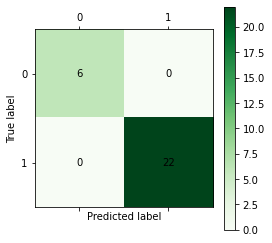

In [80]:
predict_result_train = model.predict_classes(x_train).reshape(len(data_train)) #给出预测类别（训练集）
from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数

cm = confusion_matrix(y_train, predict_result_train)  # 混淆矩阵

import matplotlib.pyplot as plt  # 导入作图库

plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图
plt.colorbar()  # 颜色标签

for x in range(len(cm)):  # 数据标签
    for y in range(len(cm)):
        plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label')  # 坐标轴标签
plt.xlabel('Predicted label')  # 坐标轴标签
plt.show()
# cm_plot(y_train, predict_result_train).show() #显示混淆矩阵可视化结果 看训练结果正确率


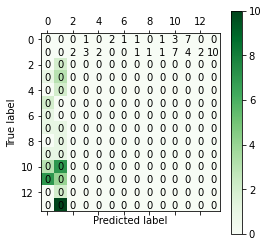

In [79]:
predict_result_test = model.predict_classes(x_test).reshape(len(data_test)) #给出预测类别（测试集）
# from cm_plot import *
# cm_plot(y_test, predict_result_test).show() #显示混淆矩阵可视化结果 看训练结果正确率
from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数

cm = confusion_matrix(y_test, predict_result_test)  # 混淆矩阵

import matplotlib.pyplot as plt  # 导入作图库

plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图
plt.colorbar()  # 颜色标签

for x in range(len(cm)):  # 数据标签
    for y in range(len(cm)):
        plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label')  # 坐标轴标签
plt.xlabel('Predicted label')  # 坐标轴标签
plt.show()


In [83]:
r = DataFrame(predict_result_test, columns = [u'预测结果'])  # 给出预测类别测试集
predict_rate = DataFrame(model.predict(x_test), columns = [u'预测正确率'])  # 给出预测类别测试集
res = pd.concat([data_test.iloc[:,:5],r,predict_rate], axis=1)  # 测试集
res.to_excel('./data/precision.xlsx')
res

,事件序号,事件起始编号,事件终止编号,事件开始时间,洗浴时间点,预测结果,预测正确率
0,20,7600,7794,2015-01-09 17:08:43',17,1,1.000000e+00
1,21,7813,8078,2015-01-09 17:23:42',17,0,0.000000e+00
2,22,8138,8343,2015-01-09 18:06:47',18,0,0.000000e+00
3,23,8529,8596,2015-01-09 20:18:58',20,1,1.000000e+00
4,24,8613,8779,2015-01-09 20:32:16',20,1,1.000000e+00
5,25,9072,9212,2015-01-10 07:23:47',7,1,1.000000e+00
6,26,9341,9398,2015-01-10 08:52:26',8,1,9.999995e-01
7,27,9413,9533,2015-01-10 09:07:23',9,1,1.000000e+00
8,28,9966,10168,2015-01-10 17:31:51',17,1,1.000000e+00
9,1,218,344,2015-01-19 08:51:30',8,0,0.000000e+00
